In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("../../")

In [3]:
%pwd

'/Users/bhikipallai/Desktop/Projects/95Mobiles'

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Vicky7873/data/main/laptop_price.csv",encoding='ISO-8859-1')
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [5]:
import requests
response = requests.get("https://raw.githubusercontent.com/Vicky7873/data/main/laptop/laptop_price.csv")
with open("lap.csv",'wb') as file:
    file.write(response.content)

# Minor EDA

In [6]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [10]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [11]:
df.drop(columns='laptop_ID',axis=1,inplace=True)

In [12]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [13]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [14]:
df.shape

(1303, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [16]:
special_chars_found = False

# Check all float64 columns for special characters
for col in df.select_dtypes(include='float64').columns:
    # Check for non-numeric values in the float columns
    non_numeric = pd.to_numeric(df[col], errors='coerce').isna()

    if non_numeric.any():
        special_chars_found = True
        print(f"Special characters or invalid entries found in column: {col}")
        print(df[non_numeric][[col]])  # Display rows with invalid entries

if not special_chars_found:
    print("No special characters found in numeric columns.")

No special characters found in numeric columns.


In [17]:
df = df.rename(columns={"Price_euros":"price"})

In [18]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [19]:
df['price'] = df['price'].multiply(92)
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,123251.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,82702.48


In [20]:
cat_cols = []

for col in df.columns:
    if df[col].dtypes == 'object':
        cat_cols.append(col)

In [21]:
cat_cols

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

In [22]:
for col in df[cat_cols]:
    print(df[col].name,df[col].nunique())
    print(df[col].unique())

Company 19
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Product 618
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook Max'
 'GS73VR 7RG' 'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/

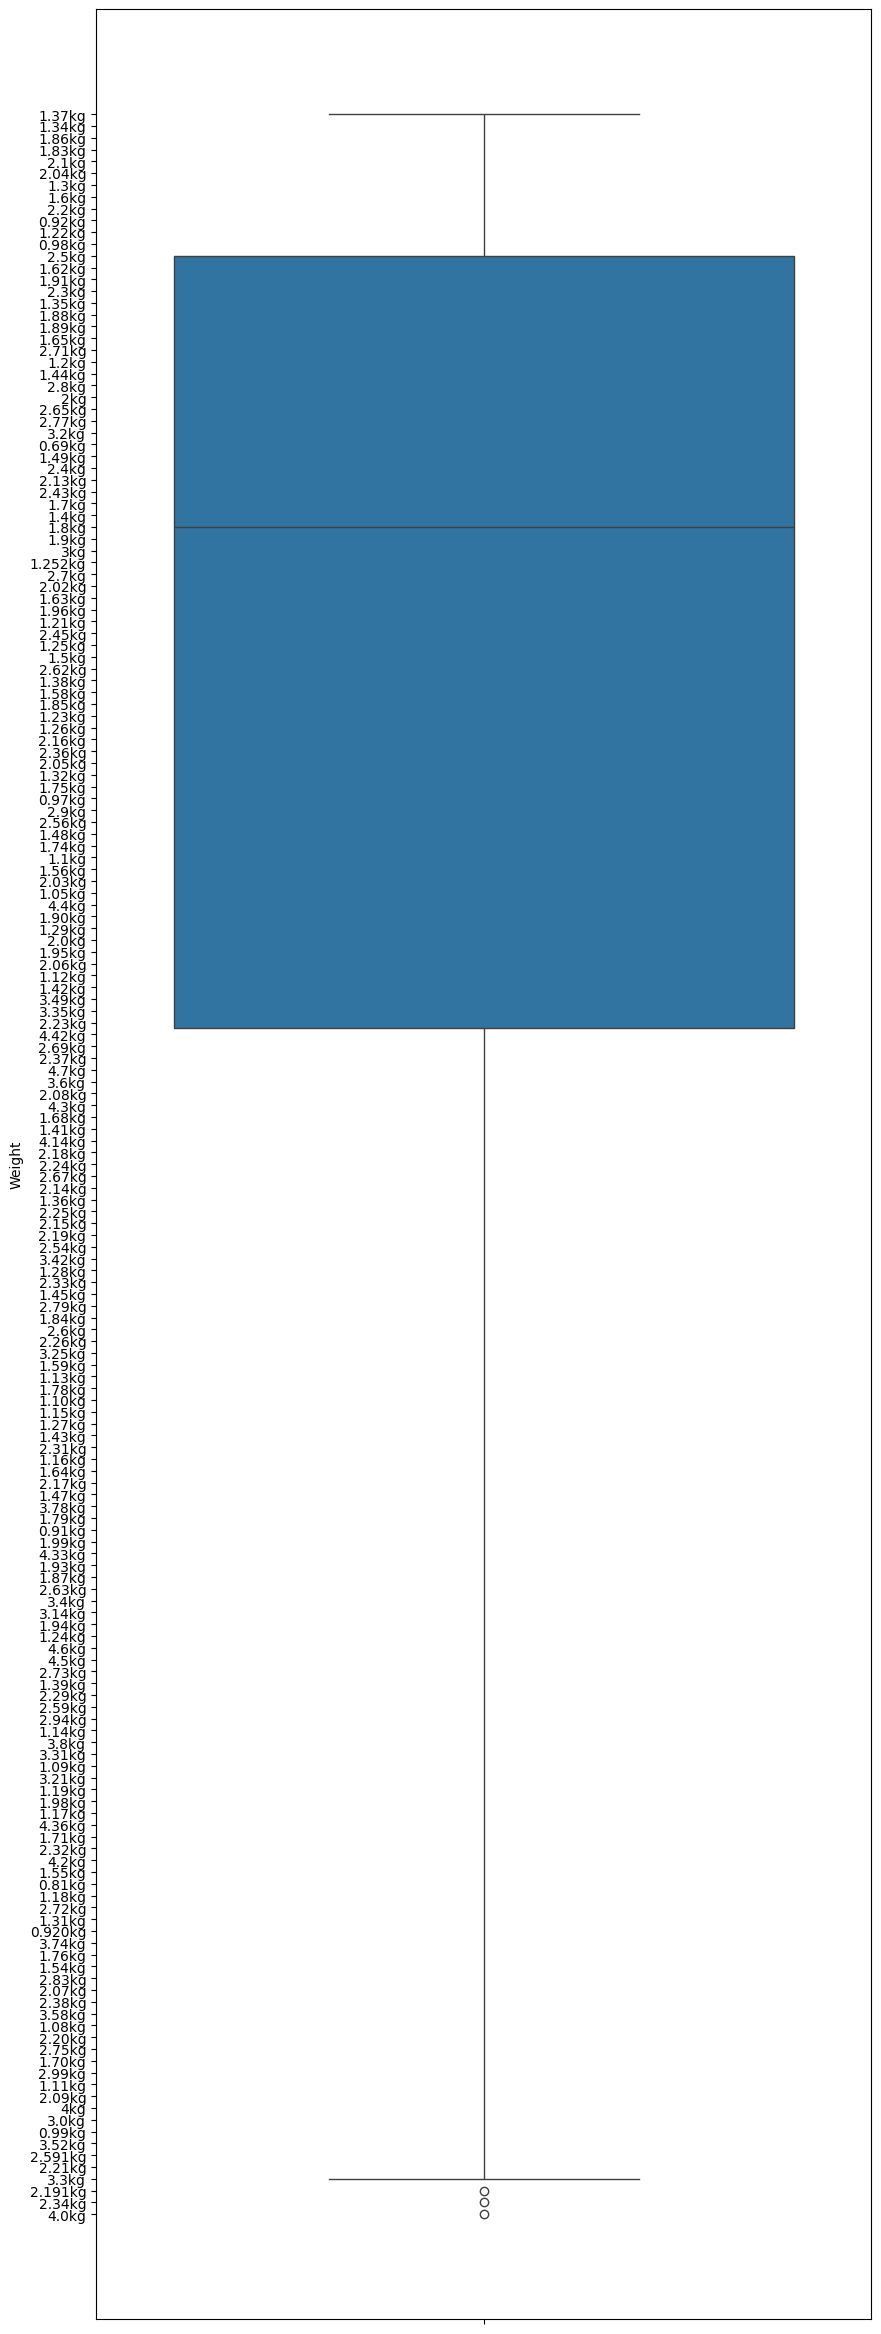

In [23]:
plt.figure(figsize=(10, 30))
sns.boxplot(df['Weight'])
plt.show()

In [24]:
# their is no outliers

In [25]:
df['Weight'] = df['Weight'].str.replace("kg",'').astype(float)

In [26]:
df['Weight'].dtype

dtype('float64')

In [27]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,123251.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,82702.48


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [29]:
le = StandardScaler()

In [30]:
# df['Weight']=le.fit_transform(df[['Weight']])

In [31]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,123251.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,82702.48


In [32]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight              float64
price               float64
dtype: object

# Insihts

In [33]:
# for weights my solution is to remove the kg word from the col and make the data type to float and then apply transoformer

In [34]:
cat_cols

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

In [35]:
num_cols = []

for col in df.columns:
    if df[col].dtype == 'float64':
        num_cols.append(col)

In [36]:
num_cols

['Inches', 'Weight', 'price']

In [37]:
num_cols.remove('price')

In [38]:
num_cols

['Inches', 'Weight']

In [39]:
for col in df[num_cols]:
    df[col] = le.fit_transform(df[[col]])

df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,Apple,MacBook Pro,Ultrabook,-1.204407,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,-1.005283,123251.48
1,Apple,Macbook Air,Ultrabook,-1.204407,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,-1.050381,82702.48


In [40]:
cat_cols.remove('Weight')

In [41]:
lbe = LabelEncoder()
for col in df[cat_cols]:
    df[col] = lbe.fit_transform(df[col])

df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,1,300,4,-1.204407,23,65,8,4,58,8,-1.005283,123251.48
1,1,301,4,-1.204407,1,63,8,2,51,8,-1.050381,82702.48


In [42]:
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              171
price               791
dtype: int64

# data split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop('price',axis=1)
y = df['price']

In [45]:
X.shape,y.shape

((1303, 11), (1303,))

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1042, 11), (261, 11), (1042,), (261,))

# Model BUilding

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet,Ridge,Lasso

In [49]:
models = {
    "lr":LinearRegression(),
    "rfr":RandomForestRegressor(),
    "dtr":DecisionTreeRegressor(),
    "enet":ElasticNet(),
    "ridge":Ridge(),
    "lasso":Lasso()
}

In [50]:
grid_params = {
    "lr":{
        "fit_intercept":[False,True]
    },
    "rfr":{
        "n_estimators":[15,17,19],
        "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
        "bootstrap" : [True,False],
        "oob_score" : [True,False]

    },
    "dtr":{
        "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
        "splitter":["best","random"]
    },
    "enet":{
        "alpha":[1.0,0.5,1.5,2.0],
        "l1_ratio" :[0.3,0.4,0.5],
        "selection": ["cyclic","random"]
    },
    "ridge":{
        "alpha":[1.0,0.5,1.5,2.0],
        "solver":['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },

    "lasso" : {
        "alpha":[1.0,0.5,1.5,2.0],
    }
}

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
best_score = -float("inf")
best_model = None
best_model_name = None


for model_name,model in models.items():
    models_gdr = GridSearchCV(model,param_grid=grid_params[model_name],cv=5)
    models_gdr.fit(X_train,y_train)
    print("Best parameters: ", models_gdr.best_params_)
    print("best score: ", models_gdr.best_score_)
    print("best estimator: ", models_gdr.best_estimator_)

    if models_gdr.best_score_>best_score:
        best_score = models_gdr.best_score_
        best_model = models_gdr.best_estimator_
        best_model_name = model_name


print("Best Model Type:", best_model_name)
print("Best Model Score:", best_score)
print("Best Model:", best_model)

Best parameters:  {'fit_intercept': True}
best score:  0.48303835520896576
best estimator:  LinearRegression()


/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Applications/anaconda3/envs/95m/lib/python3.12/site-package

Best parameters:  {'bootstrap': True, 'criterion': 'poisson', 'n_estimators': 15, 'oob_score': True}
best score:  0.818052847453864
best estimator:  RandomForestRegressor(criterion='poisson', n_estimators=15, oob_score=True)
Best parameters:  {'criterion': 'poisson', 'splitter': 'best'}
best score:  0.7086693027276936
best estimator:  DecisionTreeRegressor(criterion='poisson')
Best parameters:  {'alpha': 0.5, 'l1_ratio': 0.5, 'selection': 'cyclic'}
best score:  0.4745826170391906
best estimator:  ElasticNet(alpha=0.5)


/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/a

Best parameters:  {'alpha': 2.0, 'solver': 'auto'}
best score:  0.48306925069555096
best estimator:  Ridge(alpha=2.0)
Best parameters:  {'alpha': 2.0}
best score:  0.48303846078864654
best estimator:  Lasso(alpha=2.0)
Best Model Type: rfr
Best Model Score: 0.818052847453864
Best Model: RandomForestRegressor(criterion='poisson', n_estimators=15, oob_score=True)


In [54]:
best_model.predict([[1,300,4,-1.204407,23,65,8,4,58,8,-1.005283]])

/Applications/anaconda3/envs/95m/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([121645.22133333])